In [4]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.model_selection import ParameterGrid


In [5]:
clean_data = pd.read_csv('new_df_withoutmissing.csv')
clean_data

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,0,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,1,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,2,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,3,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,4,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...
230190,230190,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230191,230191,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230192,230192,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230193,230193,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [6]:
clean_data.isnull().sum()

Unnamed: 0                     0
Account No                     0
Balance                        0
Amount                         0
Third Party Account No    223360
Third Party Name            6835
DateTime                       0
dtype: int64

In [7]:
clean_data = clean_data.drop(['Unnamed: 0', 'Third Party Account No'], axis=1)

In [8]:
data = clean_data.dropna()
data

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [9]:
df = pd.DataFrame(data)

zero_amount_df = df[df['Amount'] == 0]

zero_amount_df

,Account No,Balance,Amount,Third Party Name,DateTime
124098,950234174.0,776.302067,-0.0,Selfridges,2023-07-11 08:21:00
132563,738958551.0,5564.249325,-0.0,Amazon,2023-07-29 18:32:00
134276,730002588.0,12939.954627,-0.0,Fat Face,2023-07-31 17:42:00
146717,581655972.0,34362.247639,-0.0,Fitted Stitch,2023-08-15 05:45:00
168830,322221939.0,3186.856806,-0.0,Revella,2023-09-16 08:04:00
192978,912705941.0,17527.347189,-0.0,Tesco,2023-10-21 05:41:00
197832,520447032.0,7416.909870,-0.0,Lloyds Pharmacy,2023-10-30 09:22:00
213034,824916823.0,8591.033140,-0.0,Sainsbury Local,2023-11-16 05:47:00
219994,687135796.0,28698.757249,-0.0,Sainsbury,2023-11-29 07:29:00


In [10]:
df

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [11]:
data['Third Party Name'].unique()

array(['Westport Care Home', 'Barbiee Boutique', 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Frankie

In [12]:
holiday_data = {
    'date': ['2025-01-01', '2025-04-18', '2025-12-25', '2025-12-26', '2025-04-18', '2025-04-21', '2025-05-05', '2025-05-26', '2025-08-25'],
    'holiday': ['New Year\'s Day', 'Good Friday', 'Christmas Day', 'Boxing Day', 'Good Friday', 'Easter Monday', 'Early May bank holiday', 'Spring bank holiday', 'Summer bank holiday']
}
df_holidays = pd.DataFrame(holiday_data)
df_holidays

,date,holiday
0,2025-01-01,New Year's Day
1,2025-04-18,Good Friday
2,2025-12-25,Christmas Day
3,2025-12-26,Boxing Day
4,2025-04-18,Good Friday
5,2025-04-21,Easter Monday
6,2025-05-05,Early May bank holiday
7,2025-05-26,Spring bank holiday
8,2025-08-25,Summer bank holiday


In [13]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays['month_day'] = df_holidays['date'].dt.strftime('%m-%d')

data['DateTime'] = pd.to_datetime(data['DateTime'])
data['month_day'] = data['DateTime'].dt.strftime('%m-%d')

df_holidays = df_holidays.drop_duplicates(subset=['month_day'])

data['Holiday'] = data['month_day'].map(df_holidays.set_index('month_day')['holiday'])

data


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,NaN
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,NaN
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,NaN
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,NaN


In [14]:
data.fillna(False)

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [15]:
def check_holiday(holiday):
    if isinstance(holiday, str):
        return True
    else:
        return False

# Apply the function to the 'Holiday' column
data['Holiday'] = data['Holiday'].apply(check_holiday)

data


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [16]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


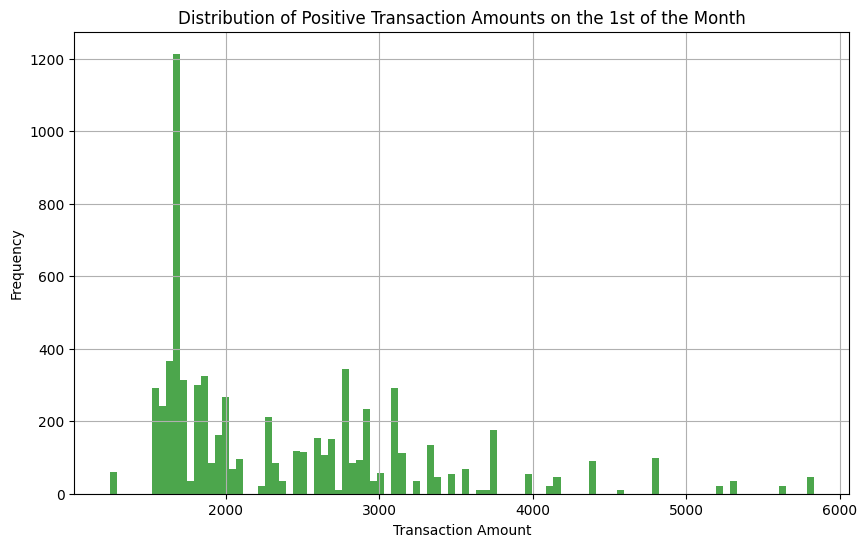

2300.0

In [17]:
# filter to consider only positive transaction amounts on the 1st as it potential to be salary
positive_transactions_on_first = data[data['Amount'] > 0]

# plot the distribution of positive transaction amounts on the 1st
plt.figure(figsize=(10, 6))
plt.hist(positive_transactions_on_first['Amount'], bins=100, color='green', alpha=0.7)
plt.title('Distribution of Positive Transaction Amounts on the 1st of the Month')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# calculate the 58th percentile of positive transaction amounts on the 1st as a potential threshold for salary identification
positive_threshold = positive_transactions_on_first['Amount'].quantile(0.58) # from graph of Don said 28,400 is med of income so i devined it into 12
positive_threshold


In [18]:
# filer data for transactions on the 1st day that are above the threshold
potential_salaries = data[(data['DateTime'].dt.day == 1) & (data['Amount'] > positive_threshold)]

# group by account and month to see if these transactions occur consistently
salary_by_account = potential_salaries.groupby('Account No').apply(lambda x: x['DateTime'].dt.month.unique())

consistent_salary_accounts = salary_by_account[salary_by_account.apply(len) >= 3]  # cutoff of at least 3 months

consistent_salary_accounts.head(), len(consistent_salary_accounts)


(Account No
 124125096.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 131388684.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 137822385.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 147474476.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 151968462.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 dtype: object,
 96)

In [19]:
# Correct the function to access the day attribute directly from the Timestamp object
salary_account_numbers = set(consistent_salary_accounts.index)
def flag_salary(row):
    if (row['Account No'] in salary_account_numbers) and (row['DateTime'].day == 1) and (row['Amount'] > positive_threshold):
        return True
    return False

# Apply the function to create the Is_Salary column
data['Is_Salary'] = data.apply(flag_salary, axis=1)

# Check results - displaying some flagged as True and some as False
data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].head(10), data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].tail(10)




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(     Account No   DateTime   Amount  Is_Salary
 0   678330503.0 2023-01-01  1584.00      False
 1   472213568.0 2023-01-01  1950.00      False
 4   624500124.0 2023-01-01  1825.00      False
 5   203466392.0 2023-01-01  2841.66       True
 6   768271776.0 2023-01-01  1950.00      False
 9   456221621.0 2023-01-01  1675.00      False
 10  350921975.0 2023-01-01  1842.50      False
 12  455831435.0 2023-01-01  1620.10      False
 15  832564361.0 2023-01-01  3542.00       True
 16  407574996.0 2023-01-01  1609.00      False,
          Account No            DateTime  Amount  Is_Salary
 230185  166019891.0 2023-12-06 20:39:00  -62.47      False
 230186  975345315.0 2023-12-06 20:40:00  -73.71      False
 230187  106601471.0 2023-12-06 20:43:00  -37.25      False
 230188  522188082.0 2023-12-06 20:48:00  -17.05      False
 230189  256002321.0 2023-12-06 20:50:00  -24.80      False
 230190  581655972.0 2023-12-06 20:54:00  -41.06      False
 230191  786141370.0 2023-12-06 20:55:00  -62.35   

In [20]:
data['Is_Salary'].sum()

1152

In [21]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,False
...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,False


In [22]:
# data['DayofWeek'] = data['DateTime'].dt.weekday
# data['HourOfDay'] = data['DateTime'].dt.hour
# data['IsWeekend'] = data['DayofWeek'].isin([5, 6])

In [23]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,False
...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,False


In [24]:
data = data[(data['Third Party Name'] != 'Halifax')]
data = data[data['Third Party Name'] != 'LBG']
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,False
...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,False


In [25]:
# drop the original 'DateTime' column
data = data.drop(['DateTime'], axis=1)

X = data.drop(['Account No'], axis=1)
X



,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary
0,2971.000000,1584.00,Westport Care Home,01-01,True,False
1,3792.000000,1950.00,Barbiee Boutique,01-01,True,False
4,3226.000000,1825.00,Fat Face,01-01,True,False
5,4607.660000,2841.66,Lavender Primary,01-01,True,True
6,3620.000000,1950.00,A Cut Above,01-01,True,False
...,...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,12-06,False,False
230191,-244.837500,-62.35,Sainsbury Local,12-06,False,False
230192,9709.172159,-32.94,Deliveroo,12-06,False,False
230193,26834.165794,-19.25,Amazon,12-06,False,False


# With flag column

In [26]:
X = data.drop(['month_day'], axis=1)
X


,Account No,Balance,Amount,Third Party Name,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,True,False
5,203466392.0,4607.660000,2841.66,Lavender Primary,True,True
6,768271776.0,3620.000000,1950.00,A Cut Above,True,False
...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,False,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,False,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,False,False
230193,366550080.0,26834.165794,-19.25,Amazon,False,False


In [27]:
X = X.drop(['Account No'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday,Is_Salary
0,2971.000000,1584.00,Westport Care Home,True,False
1,3792.000000,1950.00,Barbiee Boutique,True,False
4,3226.000000,1825.00,Fat Face,True,False
5,4607.660000,2841.66,Lavender Primary,True,True
6,3620.000000,1950.00,A Cut Above,True,False
...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False,False
230191,-244.837500,-62.35,Sainsbury Local,False,False
230192,9709.172159,-32.94,Deliveroo,False,False
230193,26834.165794,-19.25,Amazon,False,False


In [28]:
RANDOM_STATE = 10
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
        ('scaler', StandardScaler(), ['Balance', 'Amount'])
    ],
    remainder='passthrough'
)


X_preprocessed = column_transformer.fit_transform(X)

X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)

In [29]:


# One-Class SVM parem
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

# find bes param
best_score = np.inf
best_params = None

for g in ParameterGrid(param_grid):
    model = OneClassSVM(**g)
    model.fit(X_train)
    scores = model.decision_function(X_val)
    score = -scores.mean()
    if score < best_score:
        best_score = score
        best_params = g

print("Best parameters:", best_params)

oc_svm_best = OneClassSVM(**best_params)


Best parameters: {'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.1}


In [30]:
oc_svm_best.fit(X_preprocessed)

anomaly_scores = oc_svm_best.decision_function(X_preprocessed)


In [31]:
# anomaly_scores

In [32]:
anomaly_scores_df = pd.DataFrame(anomaly_scores, columns=['Anomaly Score'])

data.reset_index(drop=True, inplace=True)

# concatenate the anomaly scores with the original data
data_with_scores = pd.concat([data, anomaly_scores_df], axis=1)

print(data_with_scores.head())

    Account No  Balance   Amount    Third Party Name month_day  Holiday  \
0  678330503.0  2971.00  1584.00  Westport Care Home     01-01     True   
1  472213568.0  3792.00  1950.00    Barbiee Boutique     01-01     True   
2  624500124.0  3226.00  1825.00            Fat Face     01-01     True   
3  203466392.0  4607.66  2841.66    Lavender Primary     01-01     True   
4  768271776.0  3620.00  1950.00         A Cut Above     01-01     True   

   Is_Salary  Anomaly Score  
0      False     286.057394  
1      False    -261.403852  
2      False     106.759929  
3       True   -1802.149316  
4      False    -411.171774  


In [33]:
neg = data_with_scores[data_with_scores['Anomaly Score'] < 0]
neg


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-261.403852
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1802.149316
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,False,-411.171774
6,350921975.0,2458.500000,1842.50,Brilliant Brushes,01-01,True,False,-927.487341
8,832564361.0,5376.000000,3542.00,Premier Finance,01-01,True,True,-2312.468352
...,...,...,...,...,...,...,...,...
216809,279149837.0,1237.281050,-146.10,Sainsbury,12-06,False,False,-192.021136
216826,858989281.0,30313.885119,-2.49,Loosely Fitted,12-06,False,False,-2719.298179
216836,975345315.0,40907.910578,-73.71,Tesco,12-06,False,False,-4981.099127
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,False,-5186.826509


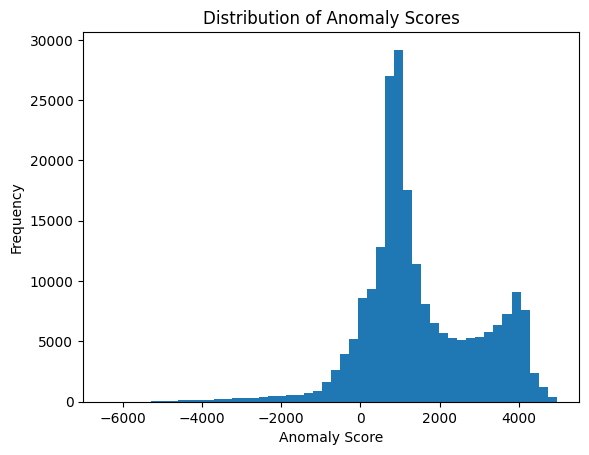

In [34]:
plt.hist(data_with_scores['Anomaly Score'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


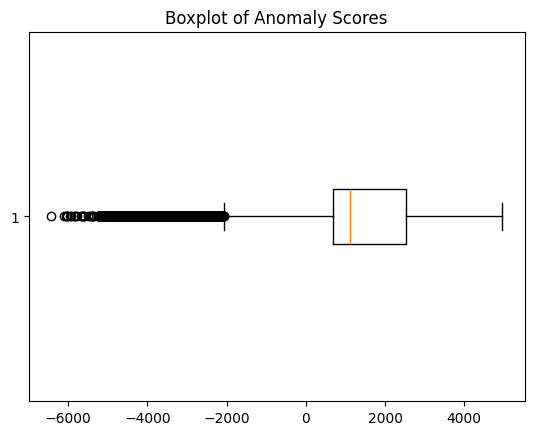

In [35]:
# Boxplot to view outliers
plt.boxplot(data_with_scores['Anomaly Score'], vert=False)
plt.title('Boxplot of Anomaly Scores')
plt.show()

In [36]:
# find threshold of anomaly scores
threshold = np.percentile(anomaly_scores, 0.17)
threshold


-4185.220039777134

In [37]:
# use threshold to identifind the anomaly behavior
data_with_scores['Is_Anomaly'] = anomaly_scores < threshold

data_with_scores


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,False,286.057394,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-261.403852,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,False,106.759929,False
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1802.149316,False
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,False,-411.171774,False
...,...,...,...,...,...,...,...,...,...
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,False,-5186.826509,True
216841,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.981509,False
216842,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,False,3592.107767,False
216843,366550080.0,26834.165794,-19.25,Amazon,12-06,False,False,-2194.507243,False


In [38]:
# neg[neg['Account No']==581655972.0]

In [52]:
data_with_scores[(data_with_scores['Is_Anomaly'] == True) & (data_with_scores['Amount']<=0)] 

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
131162,581655972.0,2023-08-02 08:55:00,35152.772609,-81.10,Tesco,08-02,False,False,-4258.860217,True,2,8,False
132644,581655972.0,2023-08-05 04:01:00,35032.350425,-57.78,Coop Local,08-05,False,False,-4220.162672,True,5,4,True
135127,581655972.0,2023-08-09 18:08:00,34586.591810,-222.60,Topshop,08-09,False,False,-5058.468719,True,2,18,False
143119,581655972.0,2023-08-26 09:48:00,33741.763043,-102.99,Sports Direct,08-26,False,False,-4285.954059,True,5,9,True
145589,581655972.0,2023-08-31 06:37:00,33518.834127,-80.32,Boots,08-31,False,False,-4185.753221,True,3,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216388,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,False,-4580.727789,True,2,5,False
216464,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,False,-4230.664923,True,2,7,False
216508,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,False,-4311.611068,True,2,8,False
216836,975345315.0,2023-12-06 20:40:00,40907.910578,-73.71,Tesco,12-06,False,False,-4981.099127,True,2,20,False


In [40]:
clean_data = clean_data[['Account No', 'DateTime', 'Balance', 'Amount']]
clean_data


,Account No,DateTime,Balance,Amount
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00
2,472213568.0,2023-01-01 00:00:00,3012.000000,-780.00
3,283027736.0,2023-01-01 00:00:00,1787.000000,780.00
4,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00
...,...,...,...,...
230190,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06
230191,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35
230192,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94
230193,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25


In [41]:
data_with_scores

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,False,286.057394,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-261.403852,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,False,106.759929,False
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1802.149316,False
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,False,-411.171774,False
...,...,...,...,...,...,...,...,...,...
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,False,-5186.826509,True
216841,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.981509,False
216842,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,False,3592.107767,False
216843,366550080.0,26834.165794,-19.25,Amazon,12-06,False,False,-2194.507243,False


In [42]:
data_with_scores = pd.merge(clean_data, data_with_scores, on=['Account No', 'Balance', 'Amount'], how='inner')
data_with_scores



,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,False,286.057394,False
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-261.403852,False
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,False,106.759929,False
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1802.149316,False
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,False,-411.171774,False
...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,False,-5186.826509,True
216841,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.981509,False
216842,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,False,3592.107767,False
216843,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,False,-2194.507243,False


In [43]:
data_with_scores['DateTime'] = pd.to_datetime(data_with_scores['DateTime'])
data_with_scores

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,False,286.057394,False
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-261.403852,False
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,False,106.759929,False
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1802.149316,False
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,False,-411.171774,False
...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,False,-5186.826509,True
216841,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.981509,False
216842,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,False,3592.107767,False
216843,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,False,-2194.507243,False


In [44]:
data_with_scores['DayofWeek'] = data_with_scores['DateTime'].dt.weekday
data_with_scores['HourOfDay'] = data_with_scores['DateTime'].dt.hour
data_with_scores['IsWeekend'] = data_with_scores['DayofWeek'].isin([5, 6])

In [45]:
data_with_scores[data_with_scores['Is_Anomaly']==True]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
19263,822718326.0,2023-01-31 00:00:00,2743.244447,3333.00,Boots,01-31,False,False,-4409.477032,True,1,0,False
19265,647472692.0,2023-01-31 00:00:00,4316.963700,4779.00,University College Hospital,01-31,False,False,-4974.757517,True,1,0,False
19283,556992209.0,2023-01-31 00:00:00,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,False,-4373.962488,True,1,0,False
19284,613729471.0,2023-01-31 00:00:00,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,False,-4310.161421,True,1,0,False
19286,348325817.0,2023-01-31 00:00:00,4077.009809,4167.00,Matalan,01-31,False,False,-4370.363497,True,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216388,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,False,-4580.727789,True,2,5,False
216464,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,False,-4230.664923,True,2,7,False
216508,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,False,-4311.611068,True,2,8,False
216836,975345315.0,2023-12-06 20:40:00,40907.910578,-73.71,Tesco,12-06,False,False,-4981.099127,True,2,20,False


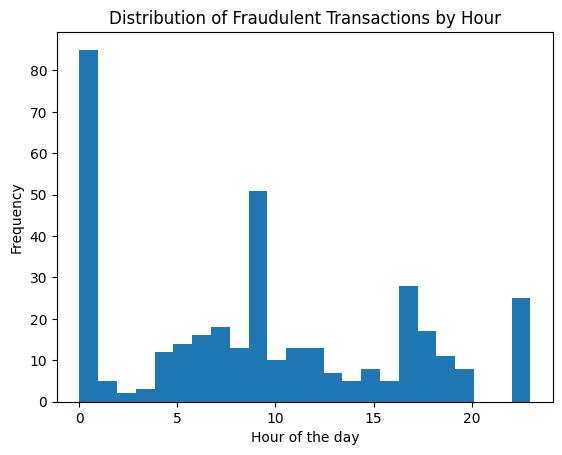

In [46]:
plt.hist(data_with_scores.loc[data_with_scores['Is_Anomaly'], 'HourOfDay'], bins=24)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()


In [47]:
flagged_df = data_with_scores[data_with_scores['Is_Anomaly']]

# Find the most common values for certain columns
common_third_party_names = flagged_df['Third Party Name'].value_counts()
common_days = flagged_df['DayofWeek'].value_counts()
common_hours = flagged_df['HourOfDay'].value_counts()
common_weekend_status = flagged_df['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)



Common Third Party Names in Flagged Transactions:
 Third Party Name
Tesco                          39
Lloyds Pharmacy                26
The Works                      22
Matalan                        19
Topshop                        19
CPA                            17
Coffee #1                      17
Loosely Fitted                 16
Amazon                         15
Sports Direct                  14
Boots                          12
Selfridges                     12
University College Hospital    12
Fitted Stitch                  11
Remedy plus care               10
Coop Local                      9
Sainsbury Local                 8
Netflix                         8
Starbucks                       8
PureGym                         7
Etsy                            7
Revella                         6
Fat Face                        6
Lavender Primary                5
Jollyes                         5
Five Senses Art                 5
AMAZON                          5
Sainsbury     

In [48]:
print("\nCommon Days of Week in Flagged Transactions:\n", common_days)
print("\nCommon Hours of Day in Flagged Transactions:\n", common_hours)
print("\nIs it Commonly on Weekends?:\n", common_weekend_status)


Common Days of Week in Flagged Transactions:
 DayofWeek
1    74
6    64
3    61
5    57
4    39
2    37
0    37
Name: count, dtype: int64

Common Hours of Day in Flagged Transactions:
 HourOfDay
0     85
9     51
17    28
23    25
7     18
18    17
6     16
5     14
11    13
12    13
8     13
4     12
19    11
10    10
20     8
15     8
13     7
1      5
14     5
16     5
3      3
2      2
Name: count, dtype: int64

Is it Commonly on Weekends?:
 IsWeekend
False    248
True     121
Name: count, dtype: int64


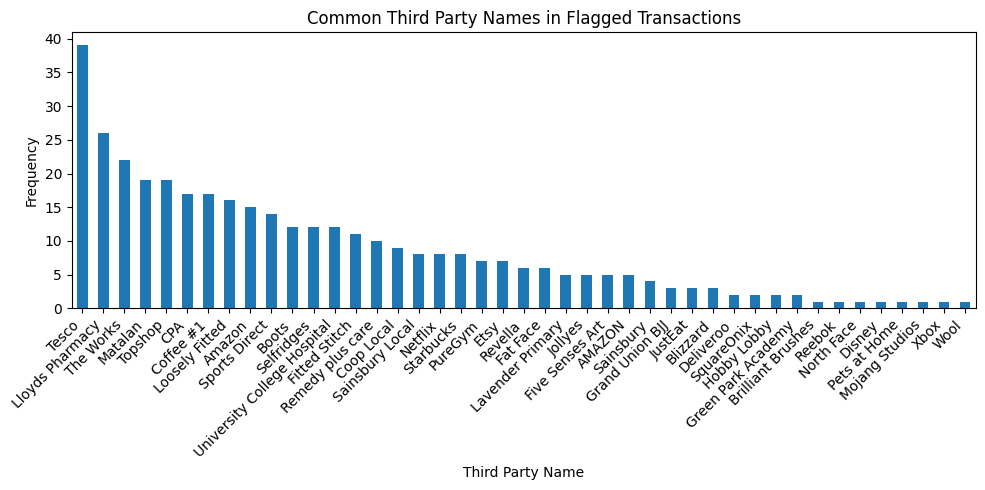

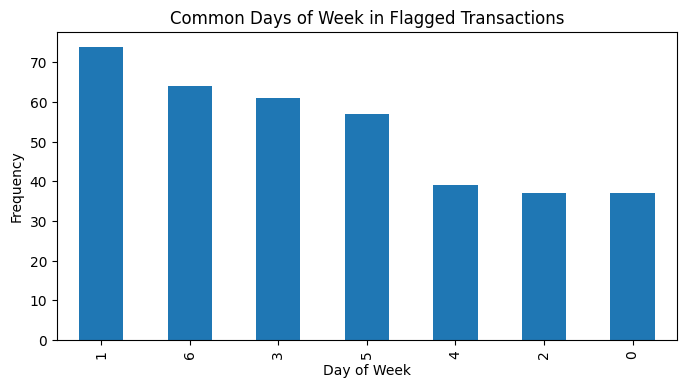

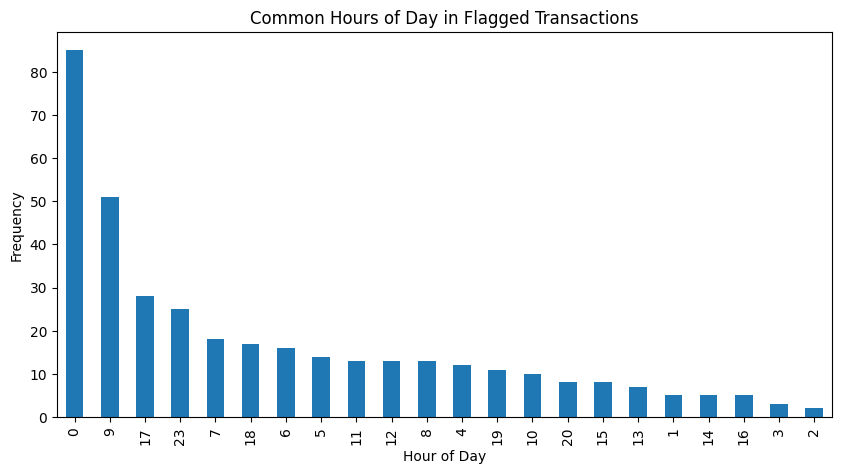

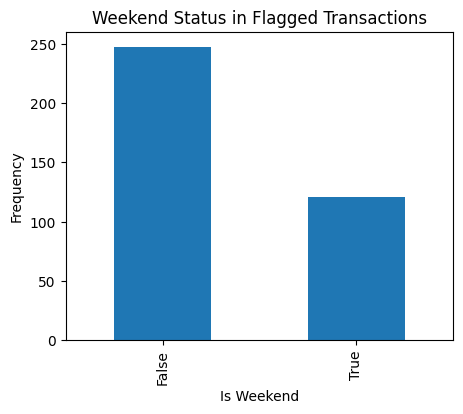

In [49]:
# Third Party Names
plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in Flagged Transactions')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the x-axis labels
plt.show()

# Days of the Week
plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Common Days of Week in Flagged Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

# Hours of Day
plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Common Hours of Day in Flagged Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

# Weekend Status
plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in Flagged Transactions')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()


In [53]:
data_with_scores

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,False,286.057394,False,6,0,True
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,False,-261.403852,False,6,0,True
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,False,106.759929,False,6,0,True
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,True,-1802.149316,False,6,0,True
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,False,-411.171774,False,6,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,False,-5186.826509,True,2,20,False
216841,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,False,230.981509,False,2,20,False
216842,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,False,3592.107767,False,2,21,False
216843,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,False,-2194.507243,False,2,21,False


In [87]:
anomalous_transactions = flagged_df.copy()
anomalous_transactions

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
19263,822718326.0,2023-01-31 00:00:00,2743.244447,3333.00,Boots,01-31,False,False,-4409.477032,True,1,0,False
19265,647472692.0,2023-01-31 00:00:00,4316.963700,4779.00,University College Hospital,01-31,False,False,-4974.757517,True,1,0,False
19283,556992209.0,2023-01-31 00:00:00,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,False,-4373.962488,True,1,0,False
19284,613729471.0,2023-01-31 00:00:00,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,False,-4310.161421,True,1,0,False
19286,348325817.0,2023-01-31 00:00:00,4077.009809,4167.00,Matalan,01-31,False,False,-4370.363497,True,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216388,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,False,-4580.727789,True,2,5,False
216464,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,False,-4230.664923,True,2,7,False
216508,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,False,-4311.611068,True,2,8,False
216836,975345315.0,2023-12-06 20:40:00,40907.910578,-73.71,Tesco,12-06,False,False,-4981.099127,True,2,20,False


In [56]:
summary_stats = anomalous_transactions['Amount'].describe()
print(summary_stats)

count     369.000000
mean      781.110108
std      1577.220907
min      -354.900000
25%       -68.500000
50%       -22.970000
75%        -3.910000
max      5833.000000
Name: Amount, dtype: float64


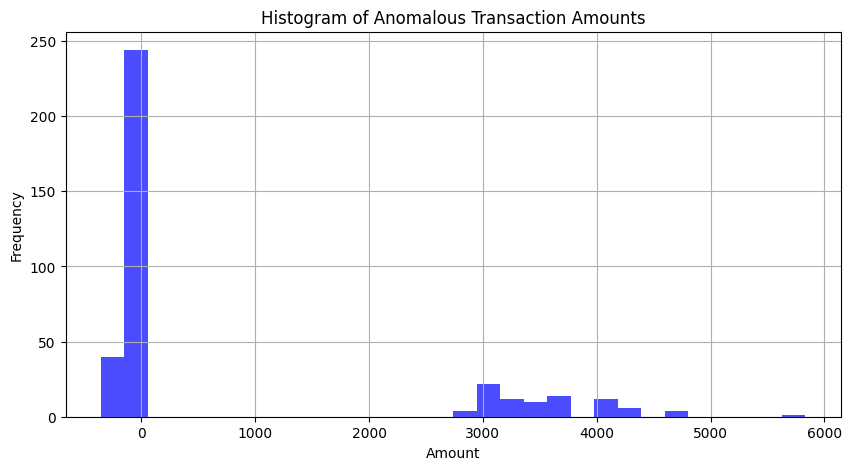

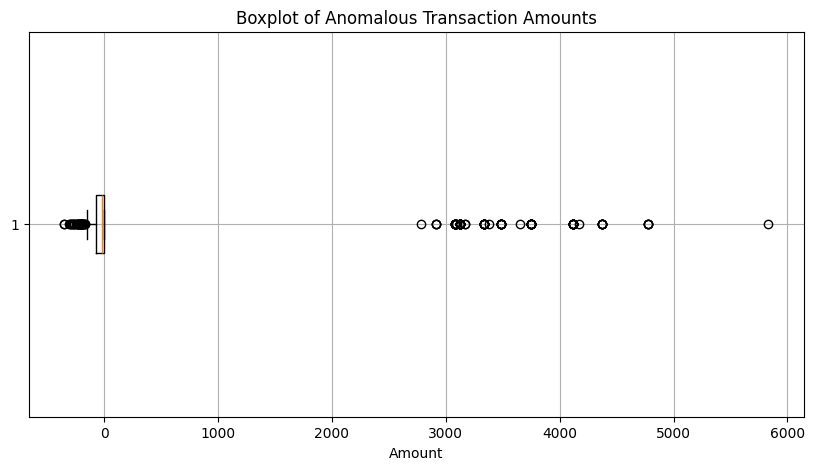

In [57]:
import matplotlib.pyplot as plt

# Histogram of the transaction amounts
plt.figure(figsize=(10, 5))
plt.hist(anomalous_transactions['Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of the transaction amounts
plt.figure(figsize=(10, 5))
plt.boxplot(anomalous_transactions['Amount'], vert=False)
plt.title('Boxplot of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.grid(True)
plt.show()


In [60]:
anomalous_transactions[anomalous_transactions['Account No'] == 581655972.0]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
131162,581655972.0,2023-08-02 08:55:00,35152.772609,-81.10,Tesco,08-02,False,False,-4258.860217,True,2,8,False
132644,581655972.0,2023-08-05 04:01:00,35032.350425,-57.78,Coop Local,08-05,False,False,-4220.162672,True,5,4,True
135127,581655972.0,2023-08-09 18:08:00,34586.591810,-222.60,Topshop,08-09,False,False,-5058.468719,True,2,18,False
143119,581655972.0,2023-08-26 09:48:00,33741.763043,-102.99,Sports Direct,08-26,False,False,-4285.954059,True,5,9,True
145589,581655972.0,2023-08-31 06:37:00,33518.834127,-80.32,Boots,08-31,False,False,-4185.753221,True,3,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215094,581655972.0,2023-12-04 02:18:00,46010.393429,-48.11,Topshop,12-04,False,False,-5253.458201,True,0,2,False
215307,581655972.0,2023-12-04 09:08:00,46003.893429,-6.50,Coffee #1,12-04,False,False,-4972.093300,True,0,9,False
215902,581655972.0,2023-12-05 06:07:00,45982.164323,-21.73,Selfridges,12-05,False,False,-5059.989590,True,1,6,False
215998,581655972.0,2023-12-05 09:03:00,45976.264323,-5.90,Coffee #1,12-05,False,False,-4964.015265,True,1,9,False


# find threshold for large amouth


In [73]:
data

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,False
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,True
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,False
...,...,...,...,...,...,...,...
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,False
216841,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,False
216842,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,False
216843,366550080.0,26834.165794,-19.25,Amazon,12-06,False,False


In [82]:
# cal mean and standard deviation for each third party
stats = data.groupby('Third Party Name')['Amount'].agg(['mean', 'std']).reset_index()
stats['Upper_Threshold'] = stats['mean'] + 3 * stats['std']
stats['Lower_Threshold'] = stats['mean'] - 3 * stats['std']

In [83]:
stats

,Third Party Name,mean,std,Upper_Threshold,Lower_Threshold
0,A Cut Above,2013.335537,488.173800,3477.856937,548.814138
1,A Yarn Story,479.914255,896.234661,3168.618239,-2208.789729
2,AMAZON,-23.595310,19.768335,35.709696,-82.900316
3,Amazon,-16.259539,16.210770,32.372772,-64.891851
4,Barbiee Boutique,2118.988235,498.282347,3613.835277,624.141194
...,...,...,...,...,...
76,Victoria Park,1581.003077,562.166461,3267.502460,-105.496306
77,Vision Express,2125.208556,374.516311,3248.757488,1001.659624
78,Westport Care Home,1716.029412,111.359299,2050.107309,1381.951515
79,Wool,-20.171848,22.784115,48.180498,-88.524193


In [88]:
# Define thresholds for unusual times and large amounts
unusual_hour_start = 0  # Midnight
unusual_hour_end = 5    # 5 AM
large_amount_threshold = 200 

anomalous_transactions = anomalous_transactions.merge(stats[['Third Party Name', 'Upper_Threshold', 'Lower_Threshold']], on='Third Party Name', how='left')

# Flag transactions based on the calculated thresholds
anomalous_transactions['Unusual_Hour'] = anomalous_transactions['HourOfDay'].apply(lambda x: unusual_hour_start <= x <= unusual_hour_end)
anomalous_transactions['Large_Amount'] = anomalous_transactions.apply(lambda row: row['Amount'] > row['Upper_Threshold'] or row['Amount'] < row['Lower_Threshold'], axis=1)
anomalous_transactions['Potential_Fraud'] = anomalous_transactions.apply(lambda row: row['Is_Anomaly'] and (row['Unusual_Hour'] or row['Large_Amount']), axis=1)

# Filter and display potentially fraudulent transactions
flagged_transactions = anomalous_transactions[anomalous_transactions['Potential_Fraud']]
flagged_transactions

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
0,822718326.0,2023-01-31 00:00:00,2743.244447,3333.00,Boots,01-31,False,False,-4409.477032,True,1,0,False,2621.543785,-2232.439771,True,True,True
1,647472692.0,2023-01-31 00:00:00,4316.963700,4779.00,University College Hospital,01-31,False,False,-4974.757517,True,1,0,False,6143.587085,1242.040034,True,False,True
2,556992209.0,2023-01-31 00:00:00,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,False,-4373.962488,True,1,0,False,2809.873883,-2342.993437,True,True,True
3,613729471.0,2023-01-31 00:00:00,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,False,-4310.161421,True,1,0,False,2809.873883,-2342.993437,True,True,True
4,348325817.0,2023-01-31 00:00:00,4077.009809,4167.00,Matalan,01-31,False,False,-4370.363497,True,1,0,False,1170.873274,-1236.317739,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,639409800.0,2023-12-03 04:33:00,40553.574098,-50.38,AMAZON,12-03,False,False,-4878.891960,True,6,4,True,35.709696,-82.900316,True,False,True
352,639409800.0,2023-12-04 02:13:00,40535.870529,-17.70,Fitted Stitch,12-04,False,False,-4497.041689,True,0,2,False,1919.322550,-1716.767014,True,False,True
353,581655972.0,2023-12-04 02:18:00,46010.393429,-48.11,Topshop,12-04,False,False,-5253.458201,True,0,2,False,116.513284,-323.859071,True,False,True
359,639409800.0,2023-12-05 05:34:00,40464.192483,-31.30,Tesco,12-05,False,False,-4536.684623,True,1,5,False,351.760166,-483.820485,True,False,True


In [89]:
flagged_transactions = flagged_transactions[(flagged_transactions['Potential_Fraud']) & (flagged_transactions['Amount']<=0)]

In [90]:
flagged_transactions


,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
57,581655972.0,2023-08-05 04:01:00,35032.350425,-57.78,Coop Local,08-05,False,False,-4220.162672,True,5,4,True,74.360260,-147.019501,True,False,True
73,581655972.0,2023-09-04 03:44:00,38524.244251,-34.54,Amazon,09-04,False,False,-4489.165098,True,0,3,False,32.372772,-64.891851,True,False,True
80,558119802.0,2023-09-08 18:07:00,28948.758648,-354.90,Loosely Fitted,09-08,False,False,-4350.242503,True,4,18,False,122.471889,-240.963713,False,True,True
82,581655972.0,2023-09-11 03:43:00,37987.024982,-70.87,Amazon,09-11,False,False,-4768.695522,True,0,3,False,32.372772,-64.891851,True,True,True
83,581655972.0,2023-09-14 05:04:00,37910.150941,-25.80,Loosely Fitted,09-14,False,False,-4268.668437,True,3,5,False,122.471889,-240.963713,True,False,True
88,581655972.0,2023-09-22 04:11:00,37611.724534,-36.59,Amazon,09-22,False,False,-4392.607757,True,4,4,False,32.372772,-64.891851,True,False,True
93,581655972.0,2023-09-25 01:55:00,37261.610183,-65.51,Sainsbury Local,09-25,False,False,-4602.513818,True,0,1,False,86.367927,-171.145398,True,False,True
120,581655972.0,2023-10-02 01:28:00,39826.968423,-42.80,Boots,10-02,False,False,-4703.893284,True,0,1,False,2621.543785,-2232.439771,True,False,True
122,581655972.0,2023-10-04 05:31:00,39819.891580,-4.39,Fitted Stitch,10-04,False,False,-4275.367594,True,2,5,False,1919.322550,-1716.767014,True,False,True
127,581655972.0,2023-10-07 05:02:00,39672.198903,-55.46,Selfridges,10-07,False,False,-4759.965765,True,5,5,True,1819.743404,-1640.653717,True,False,True


In [92]:
flagged_transactions.shape

(44, 18)

In [93]:
# show stats of 'Third Party Name'
transaction_stats = flagged_transactions.groupby('Account No').agg({
    'Amount': ['mean', 'std', 'count', 'sum'],
    'Anomaly Score': ['mean', 'min', 'max']
}).reset_index()

transaction_stats


Account No      Amount                            Anomaly Score  \
                      mean         std count      sum          mean   
0  558119802.0 -188.562500  148.117287     4  -754.25  -4839.733907   
1  581655972.0  -46.991154   66.677832    26 -1221.77  -4720.980826   
2  639409800.0  -67.228571   94.343554     7  -470.60  -4707.978847   
3  975345315.0  -56.830000   65.779694     7  -397.81  -4710.578577   

                             
           min          max  
0 -5846.789206 -4350.242503  
1 -6432.695409 -4220.162672  
2 -5786.529426 -4254.615032  
3 -5388.047243 -4430.735978

In [95]:
flagged_transactions[flagged_transactions['Account No'] == 558119802.0]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Is_Salary,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
80,558119802.0,2023-09-08 18:07:00,28948.758648,-354.90,Loosely Fitted,09-08,False,False,-4350.242503,True,4,18,False,122.471889,-240.963713,False,True,True
207,558119802.0,2023-11-04 04:51:00,35315.406254,-87.56,Etsy,11-04,False,False,-4554.013708,True,5,4,True,36.394951,-83.169640,True,True,True
306,558119802.0,2023-11-30 04:52:00,39449.662831,-42.29,Selfridges,11-30,False,False,-4607.890213,True,3,4,False,1819.743404,-1640.653717,True,False,True
345,558119802.0,2023-12-02 15:17:00,37931.844994,-269.50,Loosely Fitted,12-02,False,False,-5846.789206,True,5,15,True,122.471889,-240.963713,False,True,True


In [97]:
clean_data[clean_data['Account No'] == 558119802.0]

,Account No,DateTime,Balance,Amount
875,558119802.0,2023-01-01 00:00:00,-282.000000,-1034.00
3793,558119802.0,2023-01-01 00:00:00,-297.990000,-15.99
3794,558119802.0,2023-01-01 00:00:00,-305.980000,-7.99
4868,558119802.0,2023-01-01 10:32:00,-376.922200,-70.94
7470,558119802.0,2023-01-04 20:37:00,-446.467900,-69.55
...,...,...,...,...
227995,558119802.0,2023-12-03 08:16:00,37865.633356,-66.21
228641,558119802.0,2023-12-04 08:53:00,37854.843690,-10.79
229097,558119802.0,2023-12-04 19:20:00,37820.713690,-34.13
229272,558119802.0,2023-12-05 06:52:00,37789.800739,-30.91
